# ***Analysis of EMINST letters Dataset with MLP*** 



The first thing we're going to do is import the EMNIST libraries so that we have access to this training set.

In [0]:
# STEP 1.1

!git clone https://github.com/sorki/python-mnist
!./python-mnist/get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

fatal: destination path 'python-mnist' already exists and is not an empty directory.
/bin/bash: ./python-mnist/get_data.sh: No such file or directory
Imported the EMNIST libraries we need!


In [0]:
# STEP 1.2

# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


To make sure the data downloaded, let's take a look at some of the pictures and labels in the set.  You can change the img_index value to different numbers and run the code as many times as you want to look at the label and picture for different training instances. Some letters are pretty clear (like, 8888 is definitely a "Y"), but others not as much (like, is 1234 a loopy "L" or a "P" or maybe even an "E") 



Image Label: m


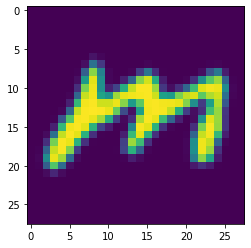

In [0]:
# STEP 2

import matplotlib.pyplot as plt

img_index = 14000 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [0]:
# STEP 3
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
#building and training the modle
mlp = MLPClassifier(hidden_layer_sizes=(200,100,100,100,100,50,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.29283198
Iteration 2, loss = 0.55611732
Iteration 3, loss = 0.44193457
Iteration 4, loss = 0.38495990
Iteration 5, loss = 0.34518443
Iteration 6, loss = 0.31314698
Iteration 7, loss = 0.29013017
Iteration 8, loss = 0.27617011
Iteration 9, loss = 0.25721352
Iteration 10, loss = 0.24564508
Iteration 11, loss = 0.23176169
Iteration 12, loss = 0.22642065
Iteration 13, loss = 0.22038435
Iteration 14, loss = 0.20144108
Iteration 15, loss = 0.19603979
Iteration 16, loss = 0.19392022
Iteration 17, loss = 0.18266283
Iteration 18, loss = 0.19276289
Iteration 19, loss = 0.18004594
Iteration 20, loss = 0.17125064
Iteration 21, loss = 0.16887280
Iteration 22, loss = 0.16708954
Iteration 23, loss = 0.16038363
Iteration 24, loss = 0.16336516
Iteration 25, loss = 0.15448890
Iteration 26, loss = 0.15701257
Iteration 27, loss = 0.14617707
Iteration 28, loss = 0.14730836
Iteration 29, loss = 0.15171117
Iteration 30, loss = 0.14850569
Iteration 31, loss = 0.13605800
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.963967
Test set score: 0.899500


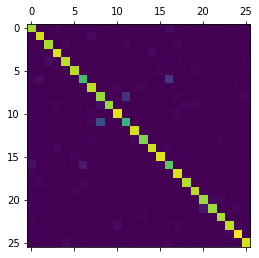

In [0]:
# STEP 4.1
#Evaluation
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)



If any of the cells off the diagonal are particularly bright, we can investigate more.

For example, "I" and "L" may be easy to confuse ("U" and "V" are also good ones to try!), so let's look at some of the cases where that happened. You can change the code and run it as many times as you want to look at some examples of these mistakes.

There were 84 times that the letter i was predicted to be the letter l.
There were 0 times that the letter G was predicted to be the letter C.
There were 0 times that the letter V was predicted to be the letter U.
There were 0 times that the letter O was predicted to be the letter Q.


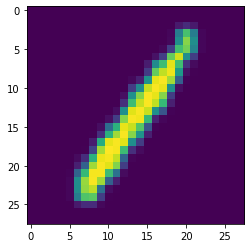

In [0]:
# STEP 4.2

# You can change this to any letters that you think the neural network may have confused...
predicted_letter = ['l','C','U','Q']
actual_letter = ['i','G','V','O']

#you c
# This code counts all mistakes for the letters above
mistake_dict = {'li':[],'CG':[],'UV':[],'QO':[]}
for i in range(len(y_test)):
  for char1,char2 in zip(predicted_letter,actual_letter):

    if (y_test[i] == (ord(char2) - 96) and y_pred[i] == (ord(char1) - 96)):
      
      mistake_dict[str(char1+char2)]+=[int(i)]

for char1,char2 in zip(predicted_letter,actual_letter):      
  print("There were " + str(len(mistake_dict[char1+char2])) + " times that the letter " + char2 + " was predicted to be the letter " + char1 + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake
charcter_to_show='li'# <<< e.g., change this to any categoriy of charcter comparison 

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_dict[charcter_to_show])> mistake_to_show):
  img = X_test[mistake_dict[charcter_to_show][mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_dict[charcter_to_show])) + " mistakes to show!")






First, we have to get the scanned letter dataset that we uploaded and saved on GitHub.

But, as you can see, those images are HUGE. So we've also done a bit of preprocessing to avoid having to download and process quite so much data. We've changed the size of every image to 128x128 pixels.The other thing you may notice is that the EMNIST dataset uses a dark background with light strokes, but our original scans have a white background with dark strokes. So, we also went ahead and inverted those colors. 



In [0]:
# STEP 5.1
#using the model on real data
# Pulls the scanned data set from GitHub
!git clone https://github.com/tawadros312/Analysis-of-EMINST-letters-Dataset-with-MLP
!git pull
!ls Analysis-of-EMINST-letters-Dataset-with-MLP/letters_mod
!cd /Analysis-of-EMINST-letters-Dataset-with-MLP/letters_mod
!pwd

# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("Analysis-of-EMINST-letters-Dataset-with-MLP/letters_mod/"))
files.sort()

fatal: destination path 'Analysis-of-EMINST-letters-Dataset-with-MLP' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git
00.jpg	10.jpg	20.jpg	30.jpg	40.jpg	50.jpg	60.jpg	70.jpg	80.jpg	90.jpg
01.jpg	11.jpg	21.jpg	31.jpg	41.jpg	51.jpg	61.jpg	71.jpg	81.jpg	91.jpg
02.jpg	12.jpg	22.jpg	32.jpg	42.jpg	52.jpg	62.jpg	72.jpg	82.jpg	92.jpg
03.jpg	13.jpg	23.jpg	33.jpg	43.jpg	53.jpg	63.jpg	73.jpg	83.jpg	93.jpg
04.jpg	14.jpg	24.jpg	34.jpg	44.jpg	54.jpg	64.jpg	74.jpg	84.jpg	94.jpg
05.jpg	15.jpg	25.jpg	35.jpg	45.jpg	55.jpg	65.jpg	75.jpg	85.jpg	95.jpg
06.jpg	16.jpg	26.jpg	36.jpg	46.jpg	56.jpg	66.jpg	76.jpg	86.jpg	96.jpg
07.jpg	17.jpg	27.jpg	37.jpg	47.jpg	57.jpg	67.jpg	77.jpg	87.jpg	97.jpg
08.jpg	18.jpg	28.jpg	38.jpg	48.jpg	58.jpg	68.jpg	78.jpg	88.jpg	98.jpg
09.jpg	19.jpg	29.jpg	39.jpg	49.jpg	59.jpg	69.jpg	79.jpg	89.jpg	99.jpg
/bin/bash: line 0: cd: /Analysis-of-EMINST-letters-Dataset-with-MLP/letters_mod: No such file or directory
/content

Here we'll read each image and add it to a list to hold the handwritten story. We'll also print this image to make sure we read it correctly -- feel free to change this index to see different letters.

Imported the scanned images.


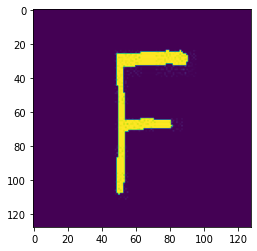

In [0]:
# STEP 5.2

# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("Analysis-of-EMINST-letters-Dataset-with-MLP/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[4])  #<--- Change this index to see different letters


Well, to the naked eye this looks similar enough to the EMNIST letters and these even seem like they're MORE clear and bright. So, let's try actually getting the story!

We're going to put the handwritten story into our trained MLP and see how it does.



The papers we scanned were really big compared to the handwritten samples that were used to train EMNIST. We resized them, but that doesn't seem to be enough. So we should try processing these images in the same way that EMNIST did.

So, let's take a look at the orginal EMNIST paper... The paper (https://arxiv.org/abs/1702.05373v1) describes the steps we need to take to process these images in one of the figures. Essentially, we need to make the strokes more blurry, we need to put the letter at the very center of the image and crop out the rest, and we need to resize each one to be 28x28 pixels.

We'll do this processing and then print out one letter to see how it turned out. As always, we can change the index in the code to see a different letter.

Processed the scanned images.


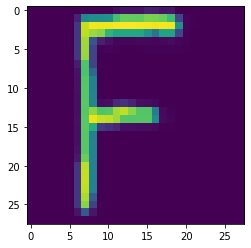

In [0]:
# STEP 5.3

# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

So even though the letter looks less clear now to our human eyes, it actually does look much more similar to the letters in the EMNIST dataset, which is good for our neural network. The edges of the letter are kind of fuzzy and it's centered in the square.

Okay, so now we can try the processing the story with our neural network 

In [0]:
# STEP 5.4

# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+96))
    
print("Conversion to typed story complete!")
print(typed_story)

Conversion to typed story complete!
thb fault im our powbr supplibs i frll in lovb thb way your battery dirs skowly and thrn all af onke


We can definitely pick out more of the words! There are still some mistakes because our neural network accuracy wasn't 100%, so we would expect to see about the same rate of error here (maybe even a bit more, since these letters were originally created at a very different size). But, looking at the context and knowing which letters are likely to be mistaken for one another, we can still read the story.

Looks like it starts: 
"The Fault in Our Power Supplies” 
“I fell in love the way your battery dies, slowly and then all at once”
